![alt text](https://drive.google.com/uc?export=view&id=1UXScsVx_Wni_JuDdB8LeTnM6jsPfIwkW)

<span style="font-family: Arial; font-weight:bold;font-size:2em;color:#00b3e5;"> NN Learning Project Part B
    
<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> Submitted by
    
<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> Shameer.Sutar

In [ ]:
#Importing important libraries
import numpy as np
import pandas as pd
import h5py
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report,precision_score, recall_score, f1_score, precision_recall_curve, auc
import tensorflow as tf
from keras.models import Sequential
from keras.utils.np_utils import to_categorical
from keras.layers import Activation, Dense
from keras.layers import BatchNormalization, Dropout
from keras import optimizers
import warnings
warnings.filterwarnings("ignore")

# Part B

**DOMAIN:** Autonomous Vehicles

**CONTEXT:** A Recognising multi-digit numbers in photographs captured at street level is an important component of modern-day map making. A classic example of a corpus of such street-level photographs is Google’s Street View imagery composed of hundreds of millions of geo-located 360-degree panoramic images.
The ability to automatically transcribe an address number from a geo-located patch of pixels and associate the transcribed number with a known street address helps pinpoint, with a high degree of accuracy, the location of the building it represents. More broadly, recognising numbers in photographs is a problem of interest to the optical character recognition community.
While OCR on constrained domains like document processing is well studied, arbitrary multi-character text recognition in photographs is still highly challenging. This difficulty arises due to the wide variability in the visual appearance of text in the wild on account of a large range of fonts, colours, styles, orientations, and character arrangements.
The recognition problem is further complicated by environmental factors such as lighting, shadows, specularity, and occlusions as well as by image acquisition factors such as resolution, motion, and focus blurs. In this project, we will use the dataset with images centred around a single digit (many of the images do contain some distractors at the sides). Although we are taking a sample of the data which is simpler, it is more complex than MNIST because of the distractors.

**DATA DESCRIPTION:** The SVHN is a real-world image dataset for developing machine learning and object recognition algorithms with the minimal requirement on data formatting but comes from a significantly harder, unsolved, real-world problem (recognising digits and numbers in natural scene images). SVHN is obtained from house numbers in Google Street View images.

Where the labels for each of this image are the prominent number in that image i.e. 2,6,7 and 4 respectively.
The dataset has been provided in the form of h5py files. You can read about this file format here: https://docs.h5py.org/en/stable/

**Acknowledgement:** Yuval Netzer, Tao Wang, Adam Coates, Alessandro Bissacco, Bo Wu, Andrew Y. Ng Reading Digits in Natural Images with Unsupervised Feature Learning NIPS Workshop on Deep Learning and Unsupervised Feature Learning 2011. PDF
http://ufldl.stanford.edu/housenumbers as the URL for this site.

**PROJECT OBJECTIVE:** To build a digit classifier on the SVHN (Street View Housing Number) dataset. 

# Steps and tasks:

# 1. Data Import and Exploration


## A. Read the .h5 file and assign to a variable.

In [37]:
# Import Libraries
import h5py

# Open the SVHN .h5 file and assign to variable
AV_SVHN = h5py.File('Autonomous_Vehicles_SVHN_single_grey1.h5', 'r')

AV_SVHN

<HDF5 file "Autonomous_Vehicles_SVHN_single_grey1.h5" (mode r)>

## B. Print all the keys from the .h5 file.

In [38]:
# Keys in .h5 file
AV_SVHN.keys()

<KeysViewHDF5 ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']>

## C. Split the data into X_train, X_test, Y_train, Y_test

In [39]:
# Load the training and test set
X_train = AV_SVHN['X_train'][:]
y_train = AV_SVHN['y_train'][:]
X_test = AV_SVHN['X_test'][:]
y_test = AV_SVHN['y_test'][:]

y_train

array([2, 6, 7, ..., 7, 0, 4], dtype=uint8)

# 2. Data Visualisation and preprocessing
## A. Print shape of all the 4 data split into x, y, train, test to verify if x & y is in sync. 

In [40]:
# Print shape of the training and test sets
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(42000, 32, 32) (42000,)
(18000, 32, 32) (18000,)


## B. Visualise first 10 images in train data and print its corresponding labels. 

<ipython-input-41-445d1f523bfb>:6: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


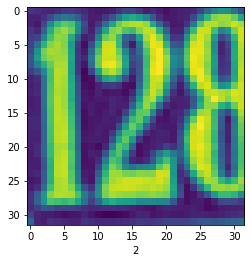

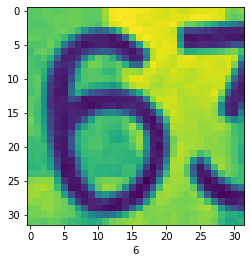

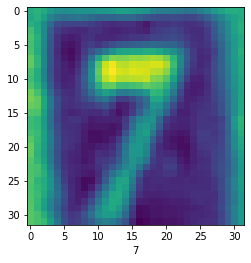

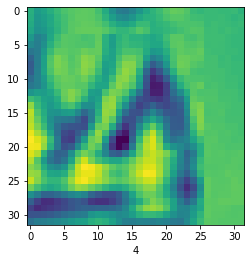

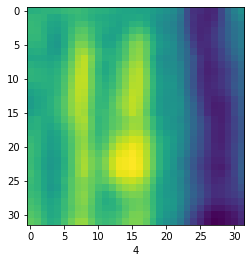

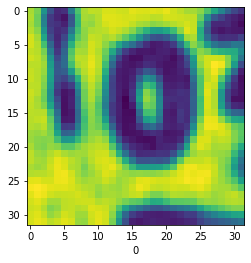

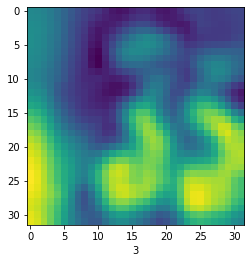

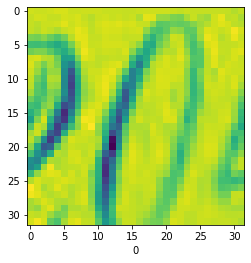

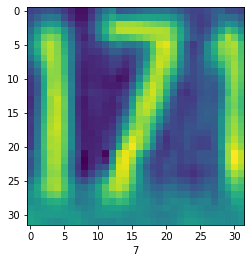

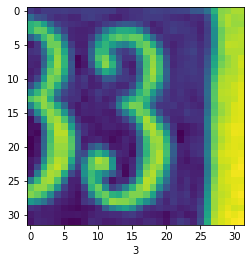

In [41]:
for i in range(10):
    image = X_train[i]
    plt.figure(i)
    plt.imshow(image)
    plt.xlabel(y_train[i])
    plt.show()

label for each of the above image: [2 6 7 4 4 0 3 0 7 3]


<ipython-input-42-d985bd56aa84>:9: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


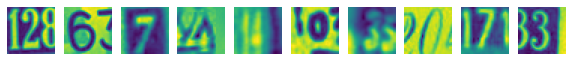

In [42]:
# visualizing the first 10 images in the dataset and their labels
plt.figure(figsize=(10, 1))

for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i])
    plt.axis('off')

plt.show()
print('label for each of the above image: %s' % (y_train[0:10]))

## C. Reshape all the images with appropriate shape update the data in same variable.

In [43]:
# Shape of the images and the first image

print("Shape:", X_train[0].shape)
print()
print("First image:\n", X_train[0])

Shape: (32, 32)

First image:
 [[ 33.0704  30.2601  26.852  ...  71.4471  58.2204  42.9939]
 [ 25.2283  25.5533  29.9765 ... 113.0209 103.3639  84.2949]
 [ 26.2775  22.6137  40.4763 ... 113.3028 121.775  115.4228]
 ...
 [ 28.5502  36.212   45.0801 ...  24.1359  25.0927  26.0603]
 [ 38.4352  26.4733  23.2717 ...  28.1094  29.4683  30.0661]
 [ 50.2984  26.0773  24.0389 ...  49.6682  50.853   53.0377]]


In [44]:
# Reshaping the dataset to flatten them. Reshape the 2D image data into a 1D array

X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [45]:
# Check Shape of the images and the first image

print("Shape:", X_train[0].shape)
print()
print("First image:\n", X_train[0])

Shape: (1024,)

First image:
 [33.0704 30.2601 26.852  ... 49.6682 50.853  53.0377]


In [46]:
print("X_train",X_train.shape," X_test", X_test.shape, 'y_train',y_train.shape, 'y_test',y_test.shape)

X_train (42000, 1024)  X_test (18000, 1024) y_train (42000,) y_test (18000,)


## D. Normalise the images i.e. Normalise the pixel values.

In [47]:
# Normalize inputs from 0-255 to 0-1

X_train = X_train/255
X_test = X_test/255

print("Max value in X_train:", X_train.max())
print("Min value in X_train:", X_train.min())

Max value in X_train: 0.9999
Min value in X_train: 0.0


## E. Transform Labels into format acceptable by Neural Network

In [48]:
# one hot encode output
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

print(y_train.shape)
print(y_test.shape)

(42000, 10)
(18000, 10)


## F. Print total Number of classes in the Dataset. 

In [49]:
print("Number of classes in y_train:", y_train.shape[1])
print("Number of classes in y_test:", y_test.shape[1])

Number of classes in y_train: 10
Number of classes in y_test: 10


# 3. Model Training & Evaluation using Neural Network

## A. Design a Neural Network to train a classifier.

In [50]:
#Importing losses and optimizers modules
from tensorflow.keras import losses
from tensorflow.keras import optimizers

#Define the function
def nn_model_2():
    model = tf.keras.Sequential([
      tf.keras.layers.Dense(256, activation='relu', input_shape=(1024, )),
      tf.keras.layers.Dense(128, activation='relu'),
      tf.keras.layers.Dropout(rate = 0.2),
      tf.keras.layers.Dense(64, activation='relu'),
      tf.keras.layers.Dense(64, activation='relu'),
      tf.keras.layers.Dense(32, activation='relu'),
      tf.keras.layers.BatchNormalization(),
      tf.keras.layers.Dense(10, activation = 'softmax')             
    ]) 
    
    #declare adam optimizer with learning rate of 0.0005 
    adam = optimizers.Adam(learning_rate=0.0005)
    
    #compile the model
    model.compile(optimizer=adam, loss= 'categorical_crossentropy', metrics= ['accuracy'])
    
    return model

# Build the model
model_2 = nn_model_2()
#Print the model summary
model_2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 256)               262400    
_________________________________________________________________
dense_7 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_9 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_10 (Dense)             (None, 32)                2080      
_________________________________________________________________
batch_normalization_2 (Batch (None, 32)               

## B. Train the classifier using previously designed Architecture (Use best suitable parameters).

In [51]:
# Fit the model
history_model_2 = model_2.fit(X_train,y_train, epochs=30, validation_split=0.2, batch_size=128, verbose = 1)

Epoch 1/30
263/263 [==============================] - 3s 10ms/step - loss: 2.4033 - accuracy: 0.1021 - val_loss: 2.3047 - val_accuracy: 0.1052
Epoch 2/30
263/263 [==============================] - 2s 7ms/step - loss: 2.2890 - accuracy: 0.1189 - val_loss: 2.1596 - val_accuracy: 0.2277
Epoch 3/30
263/263 [==============================] - 3s 10ms/step - loss: 1.8858 - accuracy: 0.3172 - val_loss: 1.5831 - val_accuracy: 0.4518
Epoch 4/30
263/263 [==============================] - 3s 10ms/step - loss: 1.4916 - accuracy: 0.4929 - val_loss: 1.2670 - val_accuracy: 0.5869
Epoch 5/30
263/263 [==============================] - 3s 10ms/step - loss: 1.2837 - accuracy: 0.5770 - val_loss: 1.2077 - val_accuracy: 0.6048
Epoch 6/30
263/263 [==============================] - 2s 8ms/step - loss: 1.1842 - accuracy: 0.6167 - val_loss: 1.1311 - val_accuracy: 0.6400
Epoch 7/30
263/263 [==============================] - 2s 7ms/step - loss: 1.1063 - accuracy: 0.6433 - val_loss: 1.0468 - val_accuracy: 0.6690
Ep

## C. Evaluate performance of the model with appropriate metrics.

              precision    recall  f1-score   support

           0       0.72      0.86      0.78      1814
           1       0.68      0.88      0.77      1828
           2       0.83      0.79      0.81      1803
           3       0.82      0.69      0.75      1719
           4       0.84      0.83      0.84      1812
           5       0.78      0.77      0.77      1768
           6       0.83      0.76      0.79      1832
           7       0.83      0.81      0.82      1808
           8       0.80      0.68      0.74      1812
           9       0.77      0.76      0.76      1804

    accuracy                           0.78     18000
   macro avg       0.79      0.78      0.78     18000
weighted avg       0.79      0.78      0.78     18000



<ipython-input-52-f120ccadb8d4>:21: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


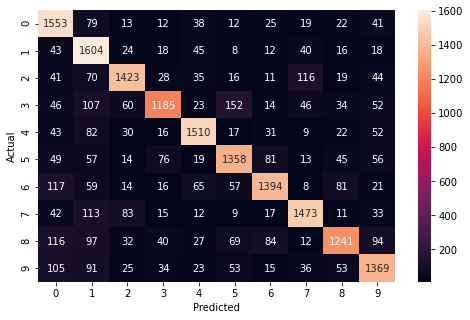

In [52]:
test_pred = model_2.predict(X_test)

test_pred = np.argmax(test_pred, axis=-1)

#Converting each entry to single label from one-hot encoded vector
y_test = np.argmax(y_test, axis=-1)

#importing required functions
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

#Printing the classification report
print(classification_report(y_test, test_pred))

#Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_test, test_pred)
plt.figure(figsize=(8,5))
sns.heatmap(cm, annot=True,  fmt='.0f')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

## D. Plot the training loss, validation loss vs number of epochs and training accuracy, validation accuracy vs number of epochs plot and write your observations on the same

<ipython-input-53-62949c5b5cc2>:12: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


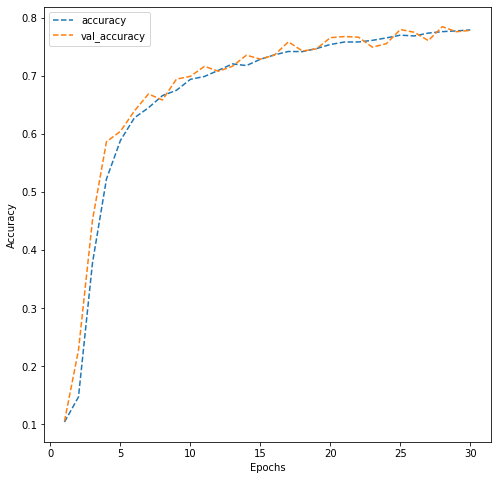

In [53]:
# plotting the accuracies

dict_hist = history_model_2.history
list_ep = [i for i in range(1,31)]

plt.figure(figsize = (8,8))
plt.plot(list_ep,dict_hist['accuracy'],ls = '--', label = 'accuracy')
plt.plot(list_ep,dict_hist['val_accuracy'],ls = '--', label = 'val_accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

<ipython-input-54-c903909191e5>:10: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


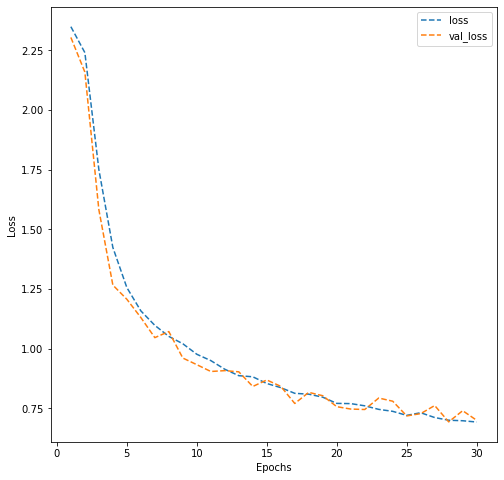

In [54]:
dict_hist = history_model_2.history
list_ep = [i for i in range(1,31)]

plt.figure(figsize = (8,8))
plt.plot(list_ep,dict_hist['loss'],ls = '--', label = 'loss')
plt.plot(list_ep,dict_hist['val_loss'],ls = '--', label = 'val_loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()

* Overfitting is not observed as both training and test accuracies are similar.
* Accuracy increases rapidly till around 8 epochs after which the rate of increase in accuracy slows down.
* Even with little ups and downs in the accuracy the overall trend is positive/increasing.

![alt text](https://drive.google.com/uc?export=view&id=1UXScsVx_Wni_JuDdB8LeTnM6jsPfIwkW)